In [268]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as scipy
%matplotlib inline


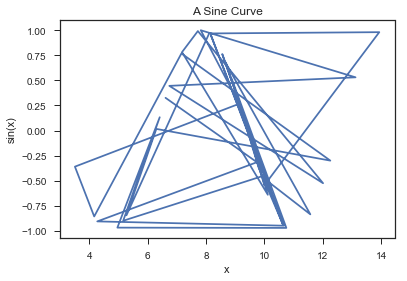

In [269]:
plt.plot(x, np.sin(x))
plt.title("A Sine Curve")
plt.xlabel("x")
plt.ylabel("sin(x)");

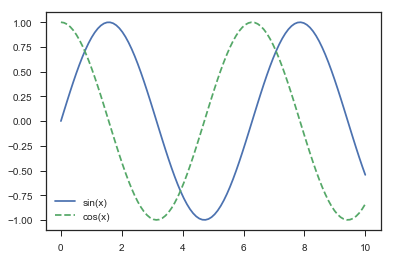

In [270]:
x = np.linspace(0, 10, 100)

fig = plt.figure()
plt.plot(x, np.sin(x), '-', label = 'sin(x)')
plt.plot(x, np.cos(x), '--', label='cos(x)');
plt.legend()

In [271]:
fig.savefig('my_figure.png')

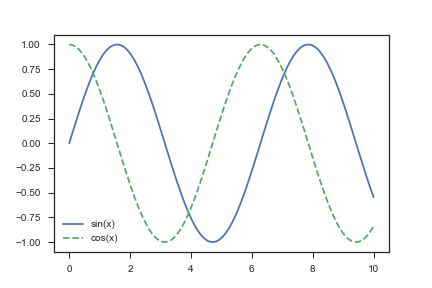

In [272]:
from IPython.display import Image
Image('my_figure.png')

In [273]:
df = pd.read_csv('adult-data.csv', names=['age', 'type_employer', 'fnlwgt', 'education', 'education_num','marital', 'occupation',
                                          'relationship', 'race','sex','capital_gain', 'capital_loss', 'hr_per_week',
                                          'country','income'])
df.head()

,age,type_employer,fnlwgt,education,education_num,marital,occupation,relationship,race,sex,capital_gain,capital_loss,hr_per_week,country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [274]:
df.tail()

,age,type_employer,fnlwgt,education,education_num,marital,occupation,relationship,race,sex,capital_gain,capital_loss,hr_per_week,country,income
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
32560,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


In [275]:
df.shape

(32561, 15)

In [276]:
#sns.jointplot(x="education_num", y="education_num", data=df[df['age','education_num']]);

In [277]:
df.columns.str.strip()
df['sex'] = df['sex'].str.strip()
maleFlag = df['sex'] == "Male"
m1 = df[maleFlag]


In [278]:
print ('Avg age of men',m1['age'].mean())

Avg age of men 39.43354749885268


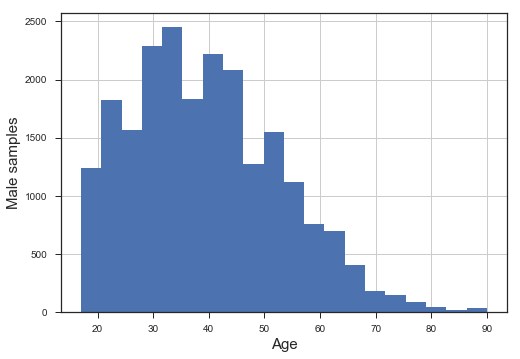

In [292]:
m1_age=m1['age']
m1_age.hist(normed=0, histtype='stepfilled', bins=20)

#m1_age.hist(histtype='stepfilled', bins=20)




plt.xlabel('Age',fontsize=15)
plt.ylabel('Male samples',fontsize=15)
plt.show()

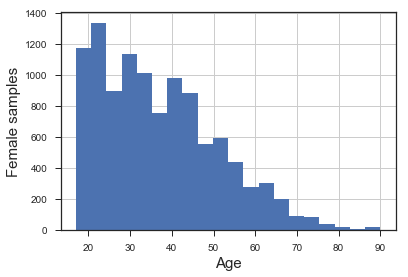

In [280]:
femaleFlag = df['sex'] == "Female"
m2 = df[femaleFlag]

m2_age=m2['age']
m2_age.hist(normed=0, histtype='stepfilled', bins=20)

plt.xlabel('Age',fontsize=15)
plt.ylabel('Female samples',fontsize=15)
plt.show()



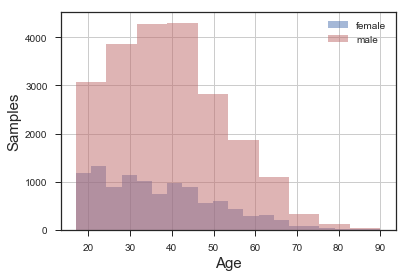

In [281]:
m2_age.hist(normed=0, histtype='stepfilled', alpha=.5, bins=20, label='female')   # default number of bins = 10
m1_age.hist(normed=0, histtype='stepfilled', alpha=.5, color=sns.desaturate("indianred", .75), bins=10, label='male')
plt.xlabel('Age',fontsize=15)
plt.ylabel('Samples',fontsize=15)
plt.legend()
plt.show()

In [282]:
sns.set(style="ticks")

# Load the example tips dataset
tips = sns.load_dataset("tips")
tips.head()


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


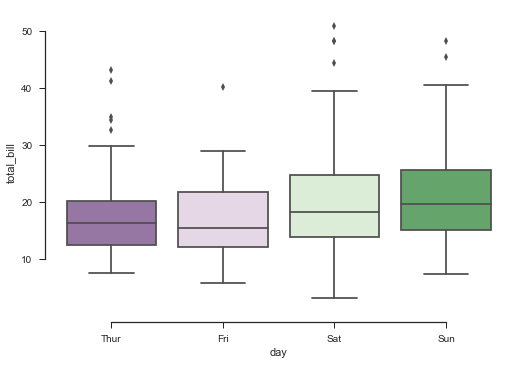

In [283]:
# Draw a nested boxplot to show bills by day
sns.boxplot(x="day", y="total_bill", data=tips, palette="PRGn")
sns.despine(offset=10, trim=True)

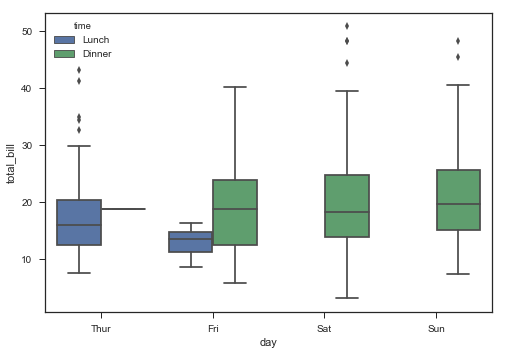

In [284]:
# Draw a nested boxplot to show bills by day and sex
sns.boxplot(x="day", y="total_bill", hue="time", data=tips);

In [285]:
def plot_hist(df, variable, bins=20, xlabel=None, by=None,
              ylabel=None, title=None, logx=False, ax=None):
    if not ax:
        fig, ax = plt.subplots(figsize=(12,8))
    if logx:
        if df[variable].min() <=0:
            df[variable] = df[variable] - df[variable].min() + 1
            print('Warning: data <=0 exists, data transformed by %0.2g before plotting' % (- df[variable].min() + 1))
        
        bins = np.logspace(np.log10(df[variable].min()),
                           np.log10(df[variable].max()), bins)
        ax.set_xscale("log")

    ax.hist(df[variable].dropna().values, bins=bins);
    
    if xlabel:
        ax.set_xlabel(xlabel);
    if ylabel:
        ax.set_ylabel(ylabel);
    if title:
        ax.set_title(title);
    
    return ax

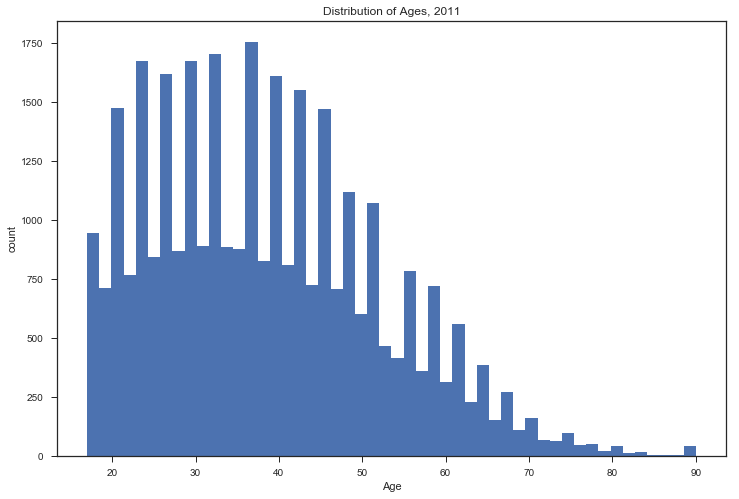

In [286]:
plot_hist(df, 'age', bins=50, 
          xlabel='Age',
          ylabel='count', 
          title='Distribution of Ages, 2011');

In [287]:
print(m2_age.mean())
print(m2_age.std())

36.85823043357163
14.01369709943824


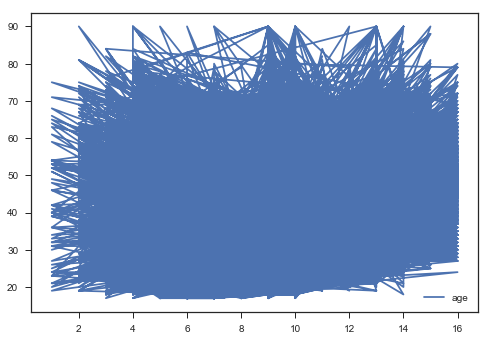

In [288]:
# does not make sense to do this graph
plt.plot(df['education_num'], df['age'], '-', label = 'age')
plt.legend()

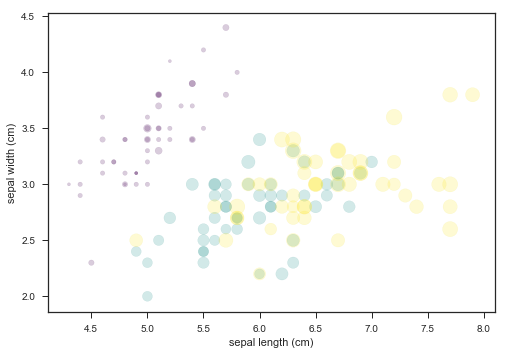

In [289]:
from sklearn.datasets import load_iris
iris = load_iris()
features = iris.data.T

plt.scatter(features[0], features[1], alpha=0.2,
            s=100*features[3], c=iris.target, cmap='viridis')
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1]);

In [290]:
import statsmodels.api as sm
x = np.random.normal(loc=8.5, scale=2.5, size=37)
y = np.random.normal(loc=8.0, scale=3.0, size=37)
pp_x = sm.ProbPlot(x)
pp_y = sm.ProbPlot(y)
qqplot_2samples(pp_x, pp_y)

NameError: name 'qqplot_2samples' is not defined

In [ ]:
df.describe().T

In [ ]:
df[['age', 'hr_per_week', 'education_num']].apply(scipy.stats.skew)